In [300]:
#          #    ######          #     #          #####
#         # #   #     #         ##    #         #     #
#        #   #  #     #         # #   #               #
#       #     # ######          #  #  #          #####
#       ####### #     #         #   # #               #
#       #     # #     #         #    ##         #     #
####### #     # ######          #     #          #####

In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import compute_sample_weight
from sklearn import metrics

In [302]:
data = pd.read_csv("./logic.csv")
data.size
print(data.head(5))


   Survey_id  Ville_id  sex  Age  Married  Number_children  education_level  \
0        926        91    1   28        1                4               10   
1        747        57    1   23        1                3                8   
2       1190       115    1   22        1                3                9   
3       1065        97    1   27        1                2               10   
4        806        42    0   59        0                4               10   

   total_members  gained_asset  durable_asset  ...  incoming_salary  \
0              5      28912201       22861940  ...                0   
1              5      28912201       22861940  ...                0   
2              5      28912201       22861940  ...                0   
3              4      52667108       19698904  ...                0   
4              6      82606287       17352654  ...                1   

   incoming_own_farm  incoming_business  incoming_no_business  \
0                  0             

In [303]:
data.info(verbose='true', show_counts='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [304]:
data.dtypes

Survey_id                  int64
Ville_id                   int64
sex                        int64
Age                        int64
Married                    int64
Number_children            int64
education_level            int64
total_members              int64
gained_asset               int64
durable_asset              int64
save_asset                 int64
living_expenses            int64
other_expenses             int64
incoming_salary            int64
incoming_own_farm          int64
incoming_business          int64
incoming_no_business       int64
incoming_agricultural      int64
farm_expenses              int64
labor_primary              int64
lasting_investment         int64
no_lasting_investmen     float64
depressed                  int64
dtype: object

In [305]:
print  (data.isna().sum()) #check nan values 

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64


In [306]:
duplicates = data.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [307]:
data = data.dropna()
data = data.drop(['Survey_id', 'Ville_id'], axis=1) # подготавливаем и удалем ненужные данные

In [308]:
print(data.head(2))

   sex  Age  Married  Number_children  education_level  total_members  \
0    1   28        1                4               10              5   
1    1   23        1                3                8              5   

   gained_asset  durable_asset  save_asset  living_expenses  ...  \
0      28912201       22861940    23399979         26692283  ...   
1      28912201       22861940    23399979         26692283  ...   

   incoming_salary  incoming_own_farm  incoming_business  \
0                0                  0                  0   
1                0                  0                  0   

   incoming_no_business  incoming_agricultural  farm_expenses  labor_primary  \
0                     0               30028818       31363432              0   
1                     0               30028818       31363432              0   

   lasting_investment  no_lasting_investmen  depressed  
0            28411718            28292707.0          0  
1            28411718            282927

In [309]:
target = data['depressed']
features = data.drop('depressed' , axis =1)
print (features)

      sex  Age  Married  Number_children  education_level  total_members  \
0       1   28        1                4               10              5   
1       1   23        1                3                8              5   
2       1   22        1                3                9              5   
3       1   27        1                2               10              4   
4       0   59        0                4               10              6   
...   ...  ...      ...              ...              ...            ...   
1424    1   25        1                1                7              5   
1425    1   28        1                4               10              6   
1426    1   66        0                0                1              1   
1427    1   51        1                1               12              5   
1428    1   33        0                4                8              5   

      gained_asset  durable_asset  save_asset  living_expenses  \
0         28912201   

In [310]:
scaler = StandardScaler()
#features_fit = scaler.fit_transform(features)
# решил сразу отсклейлить все , 


data_train, data_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state = 32)

data_train = scaler.fit_transform(X = data_train)
data_test = scaler.fit_transform(X = data_test)






In [311]:
log_reg = LogisticRegression()
log_reg.fit(data_train, target_train) 

LogisticRegression()

In [312]:
pred = log_reg.predict(data_test)

In [313]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [314]:
print(target_test)# мнда...........

1296    0
1354    0
1352    0
25      0
112     0
       ..
885     0
678     1
1226    0
7       0
883     1
Name: depressed, Length: 423, dtype: int64


In [315]:
cnf_mat = metrics.confusion_matrix(pred, target_test)

In [316]:
print (cnf_mat) 
print("Accuracy: " , metrics.accuracy_score(pred, target_test))

[[345  78]
 [  0   0]]
Accuracy:  0.8156028368794326


In [317]:
# балансировка
sample_weights = compute_sample_weight("balanced", data_train)
log_reg.fit(data_train, target_train, sample_weight=sample_weights)

LogisticRegression()

In [318]:
pred_train  =  log_reg.predict(data_train)
cnf_mat_tr =  metrics.confusion_matrix(pred_train, target_train)
print(cnf_mat_tr)

[[360  64]
 [469  93]]


In [319]:
acuracy_train = metrics.accuracy_score(pred_train, target_train)
precision_train = metrics.precision_score(pred_train, target_train)
recall_train = metrics.recall_score(pred_train, target_train)
f1_train = metrics.f1_score(pred_train, target_train)

In [320]:
tn, fp, fn, tp  = cnf_mat_tr.ravel()
all = tn+ fp+ fn + tp


print("check accurasy")
my_accurasy =  (tp+tn)/all
print (my_accurasy, "==", acuracy_train)
print("check precision")
my_precision = tp/(tp+fp)
print (my_precision, "==", precision_train)

print("check recall ")
my_recall = tp/(tp+fn)
print (my_recall, "==", recall_train)

print("check f1 ")
my_f1 =   2*(my_precision * my_recall) / (my_precision + my_recall)
print (my_f1, "==", f1_train)

check accurasy
0.4594320486815416 == 0.4594320486815416
check precision
0.5923566878980892 == 0.5923566878980892
check recall 
0.16548042704626334 == 0.16548042704626334
check f1 
0.25869262865090403 == 0.25869262865090403


In [321]:
pred_2 =  log_reg.predict(data_test)

In [322]:
cnf_mat_2 = metrics.confusion_matrix(pred_2, target_test)

In [323]:
print (cnf_mat) 
print("Accuracy: " , metrics.accuracy_score(pred_2, target_test))

[[345  78]
 [  0   0]]
Accuracy:  0.46335697399527187


In [324]:
acurasy_s = metrics.accuracy_score(pred_2, target_test)
precision_s = metrics.precision_score(pred_2, target_test)
recall_s = metrics.recall_score(pred_2, target_test)
f1_s = metrics.f1_score(pred_2, target_test)

In [325]:
# TP  FP 
# FN  TN
tn, fp, fn, tp  = cnf_mat_2.ravel()
all = tn+ fp+ fn + tp

In [326]:
my_accurasy =  (tp+tn)/all

In [327]:
print (my_accurasy, "==", acurasy_s)


0.46335697399527187 == 0.46335697399527187


In [328]:
my_precision = tp/(tp+fp)

In [329]:
print (my_precision, "==", precision_s)

0.6923076923076923 == 0.6923076923076923


In [330]:
my_recall = tp/(tp+fn)

In [331]:
print (my_recall, "==", recall_s)

0.21011673151750973 == 0.21011673151750973


In [332]:
my_f1 =   2*(my_precision * my_recall) / (my_precision + my_recall)

In [333]:
print (my_f1, "==", f1_s)

0.32238805970149254 == 0.32238805970149254


In [334]:
#####################################################################

    #          #    ######          #     #         #
    #         # #   #     #         ##    #         #    #
    #        #   #  #     #         # #   #         #    #
    #       #     # ######          #  #  #         #######
    #       ####### #     #         #   # #              #
    #       #     # #     #         #    ##              #
    ####### #     # ######          #     #              #

######################################################################

In [335]:
rand_forest = RandomForestClassifier(n_estimators=150, max_depth= 10, min_samples_split=20,  random_state=0)

In [336]:
data_train_X, data_test_X, target_train_Y, target_test_Y = train_test_split(features, target, test_size = 0.3, random_state = 32)

data_train_X = scaler.fit_transform(X = data_train_X)
data_test_X = scaler.fit_transform(X = data_test_X)


rand_forest.fit(data_train_X, target_train_Y) 


RandomForestClassifier(max_depth=10, min_samples_split=20, n_estimators=150,
                       random_state=0)

In [337]:
pred_forest = rand_forest.predict(data_test_X)


In [338]:
cnf_mat_forest = metrics.confusion_matrix(pred_forest, target_test_Y)
print(cnf_mat_forest)
print("Accuracy: " , metrics.accuracy_score(pred_forest, target_test_Y))

[[345  78]
 [  0   0]]
Accuracy:  0.8156028368794326


In [339]:
#ну 81 выглядит не плохо вроде.... 


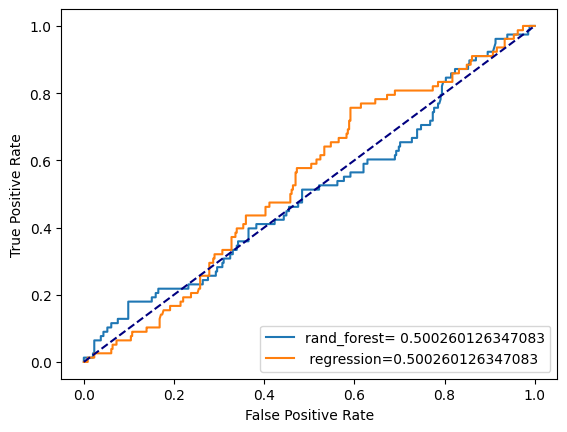

In [340]:
y_pred_rand_forest = rand_forest.predict_proba (data_test_X)[:,1]
y_pred_regression  = log_reg.predict_proba(data_test)[:,1]

fpr, tpr, treshold = metrics.roc_curve(target_test_Y, y_pred_rand_forest)
fpr_reg, tpr_ref, treshold_reg = metrics.roc_curve(target_test, y_pred_regression)


auc = metrics. roc_auc_score(target_test_Y, y_pred_rand_forest)
auc_reg = metrics. roc_auc_score(target_test, y_pred_regression)

plt.plot (fpr,tpr,label="rand_forest= "+str(auc))
plt.plot (fpr_reg, tpr_ref, label=" regression="+str(auc))


plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()
